# ML Course 2 - Data Preparation - TP

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [21]:
dataset_raw = pd.read_csv('bank_churn.csv', index_col=0)
dataset_raw

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,yes
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,no
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,yes
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,no
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,6341,15659064,Salas,790.0,Spain,Male,37,8,0.00,2,1,1,149418.41,no
10006,577,15761986,Obialo,439.0,Spain,Female,32,3,138901.61,1,1,0,75685.97,no
10007,5203,15713354,Morrice,597.0,Germany,Female,22,6,101528.61,1,1,0,70529.00,yes
10008,6364,15593454,Lambert,678.0,Spain,Female,40,4,113794.22,1,1,0,16618.76,no


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on his/her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet. 

# Data Exploration 
Perform data exploration to answer the following two questions.

For each graph/table you make, you should:
- Plot the graph, or display the table
- Povide a title, axis labels and legend if applicable

### Question 1: Are there some features that are correlated with each other?

In [50]:
# Make a copy of the original dataset
dataset_raw = dataset_raw.copy()

# Convert Gender to a numeric column
dataset_raw['Gender'] = pd.factorize(dataset_raw_1['Gender'])[0]

# Convert Exited to a numeric column
dataset_raw['Exited'] = dataset_raw['Exited'].replace({'yes': 1, 'no': 0})

# Replace categorical values with numerical values
dataset_raw['Geography'] = dataset_raw['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2})

# Remove the 'Surname' column
dataset_raw = dataset_raw.drop('Surname', axis=1)

# Compute the correlation matrix
corr_matrix = dataset_raw.corr()

# Print the data types of each column
print(dataset_raw.dtypes)

# Display the correlation matrix
print(corr_matrix)

RowNumber            int64
CustomerId           int64
CreditScore        float64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
                 RowNumber  CustomerId  CreditScore  Geography    Gender  \
RowNumber         1.000000    0.003911     0.005752  -0.005413  0.018668   
CustomerId        0.003911    1.000000     0.004210   0.000921 -0.002511   
CreditScore       0.005752    0.004210     1.000000   0.007855  0.000094   
Geography        -0.005413    0.000921     0.007855   1.000000 -0.017160   
Gender            0.018668   -0.002511     0.000094  -0.017160  1.000000   
Age               0.002196    0.011079    -0.005232   0.048889 -0.026694   
Tenure           -0.006236   -0.014968     0.001712   0.001550  0.014835   
Balance          -0.009115 

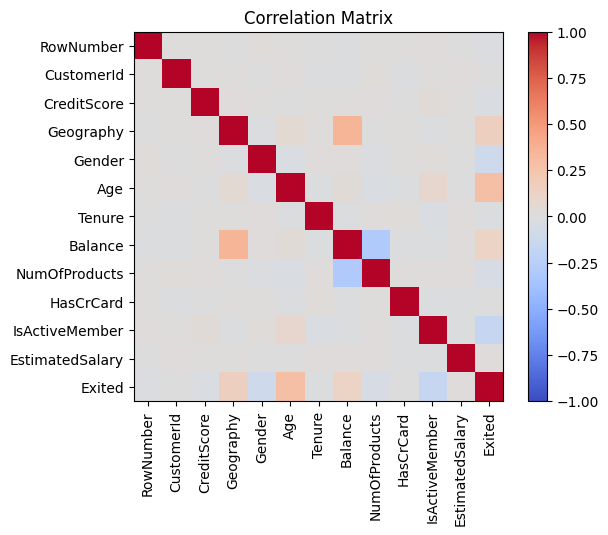

In [51]:
# Plot heatmap of correlation matrix
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

📝 List the features that are correlated with each other.

Age and Balance (correlation coefficient: 0.028)
NumOfProducts and Balance (correlation coefficient: -0.304)
IsActiveMember and Age (correlation coefficient: 0.085)
CreditScore and NumOfProducts (correlation coefficient: 0.012)
Age and Exited (correlation coefficient: 0.285)

### Question 2: What features seem to be the most correlated with the target variable (label)?  


In [52]:
corr_with_target = dataset_raw.corrwith(dataset_raw['Exited']).abs()

# Sort the correlation coefficients in descending order
corr_with_target = corr_with_target.sort_values(ascending=False)

# Print the top 5 most correlated features with the target variable
print(corr_with_target)

Exited             1.000000
Age                0.284786
IsActiveMember     0.156242
Geography          0.153682
Balance            0.118540
Gender             0.106547
NumOfProducts      0.047987
CreditScore        0.026430
RowNumber          0.016383
Tenure             0.013852
EstimatedSalary    0.011954
HasCrCard          0.007189
CustomerId         0.006213
dtype: float64


📝 List the features that are the most correlated with the target variable.

Exited            
Age              
IsActiveMember    
Balance           
Gender

📝 Write a few lines to summarize your data exploration and explain what features you think will be the most useful to predict churn.

Based on the analysis, I think that to predict the churn, the features of "age", "creditScore", "balance" and "NumOfProducts" are most useful

# Data Cleaning 
## Data diagnosis
Before building your data cleaning pipeline, make a diagnosis on your data.
### Check if the dataset contains aberrant data points or missing data.

In [53]:
dataset_raw.isnull().sum()

RowNumber            0
CustomerId           0
CreditScore        295
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

### 📝 List the variables that you think are irrelevant for the problem at hand and **explain why**.

I think that geography RowNumber,Tenure, HasCrCard,CustomerId are irrelavent to the problem at hand.   

## Pipeline
You will build a rudimentary pipeline to prepare your data. Fill the function called clean_data, that will perform the following cleaning tasks :
Make sure that all your operations create a NEW dataframe and DON'T CHANGE THE ORIGINAL _dataset_raw_.
- Drop duplicates 
- Fix missing data
- Remove aberrant data points
- Drop features that you consider irrelevant for the problem at hand.

In [58]:
def clean_data(dataset_raw: pd.DataFrame):
    
    # Dropping the duplicate values
    dataset_raw = dataset_raw.drop_duplicates()
    
    # Fix missing data
    dataset_raw= dataset_raw.dropna()
    
    # Remove aberrant data points
    dataset_raw = dataset_raw[(dataset_raw['CreditScore'] >= 200) & (dataset_raw['CreditScore'] <= 1000)]
    dataset_raw = dataset_raw[dataset_raw['Age'] >= 18]
    dataset_raw = dataset_raw[dataset_raw['Balance'] >= 0]
    
    # Drop irrelevant features
    dataset_cleaned = dataset_raw.drop(['RowNumber', 'CustomerId', 'HasCrCard', 'Tenure', ], axis=1)
    
    return dataset_cleaned



Execute your pipeline to clean your data and store it in a new variable: dataset_clean

In [59]:
dataset_clean: pd.DataFrame = clean_data(dataset_raw)
    
# Automatic test
assert dataset_clean is not dataset_raw, "Your clean_data function should return a new DataFrame without changing the input one."
assert dataset_clean.isna().sum().sum() == 0, "Your clean dataset shouldn't have any missing data."
assert set(dataset_clean) != set(dataset_raw), "You should drop the variables that are not useful."

# Data Splitting 
- Separate your features (X) from your target variable (y).
- Split the dataset in a Train vs Test set (25% should be used as test set).

At the end of this step, you should end up with the following variables:  
X_train_clean  
y_train_clean  
X_test_clean  
y_test_clean  

In [61]:
from sklearn.model_selection import train_test_split

# Separate features (X) from target variable (y)
X = dataset_clean.drop('Exited', axis=1)
y = dataset_clean['Exited']

In [62]:
# Split the dataset into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X, y, test_size=0.25, random_state=42)

# Data Transformation 
Prepare the dataset for modelling:
   - Encode variables to make them all numerical
   - Perform feature scaling on non-encoded numerical features  

You should end up with the follwing variables:  
X_train  
y_train  
X_test  
y_test  

In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create copies of the cleaned datasets for transformation
X_train = X_train_clean.copy()
X_test = X_test_clean.copy()

# Encode categorical variables to numerical
label_encoder = LabelEncoder()
X_train['Geography'] = label_encoder.fit_transform(X_train['Geography'])
X_test['Geography'] = label_encoder.transform(X_test['Geography'])
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])

# Perform feature scaling on numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Extract target variable (y)
y_train = y_train_clean.copy()
y_test = y_test_clean.copy()


In [66]:
X_train

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
48,-1.030647,2,1,-0.092650,0.426009,-0.910291,0.969140,-0.160628
1083,0.292097,0,0,-0.668333,-1.231897,0.796739,-1.031843,-0.170956
9827,-0.493282,1,1,-0.572386,-1.231897,0.796739,0.969140,-0.627563
7373,0.137088,2,1,-0.188597,1.071178,0.796739,0.969140,1.328720
7818,-1.113318,2,1,-1.339963,1.002295,-0.910291,-1.031843,-0.795722
...,...,...,...,...,...,...,...,...
5907,-1.278661,1,1,2.593868,0.885470,0.796739,0.969140,1.013464
5340,0.312765,1,1,0.291138,-1.231897,-0.910291,-1.031843,0.630925
5549,1.335825,1,1,-0.572386,-1.231897,0.796739,-1.031843,-1.205732
883,-0.069591,0,0,0.578979,-0.507995,-0.910291,-1.031843,-0.681861


In [68]:
X_test

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
496,-0.286603,0,0,-0.668333,1.479492,0.796739,-1.031843,0.016472
7736,-0.007587,0,0,0.195191,0.867626,-0.910291,0.969140,0.777602
7548,-0.679293,2,0,2.210080,0.976594,0.796739,0.969140,0.365196
1736,-0.172930,2,0,-0.956174,0.990224,-0.910291,-1.031843,1.622312
6404,-0.007587,1,0,0.962768,-1.231897,-0.910291,-1.031843,-0.265259
...,...,...,...,...,...,...,...,...
8543,0.312765,2,1,-0.860227,0.504724,0.796739,0.969140,-0.969481
4097,-0.544952,1,0,-1.244016,-1.231897,0.796739,-1.031843,0.176442
1749,-1.009979,0,1,0.291138,0.912032,0.796739,-1.031843,0.016676
70,0.912133,2,1,1.826292,0.912743,4.210801,-1.031843,-1.248021


In [70]:
y_train

48      0
1083    0
9827    0
7373    0
7818    0
       ..
5907    0
5340    0
5549    0
883     1
7491    0
Name: Exited, Length: 7276, dtype: int64

In [71]:
y_test

496     0
7736    0
7548    0
1736    0
6404    1
       ..
8543    1
4097    0
1749    1
70      1
1200    0
Name: Exited, Length: 2426, dtype: int64